<a href="https://colab.research.google.com/github/thatadi/Breast-Cancer-Detection/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import  accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [65]:
#remove last column since it has null values
df = df.iloc[:, :-1]

In [66]:
df.shape

(569, 32)

In [67]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

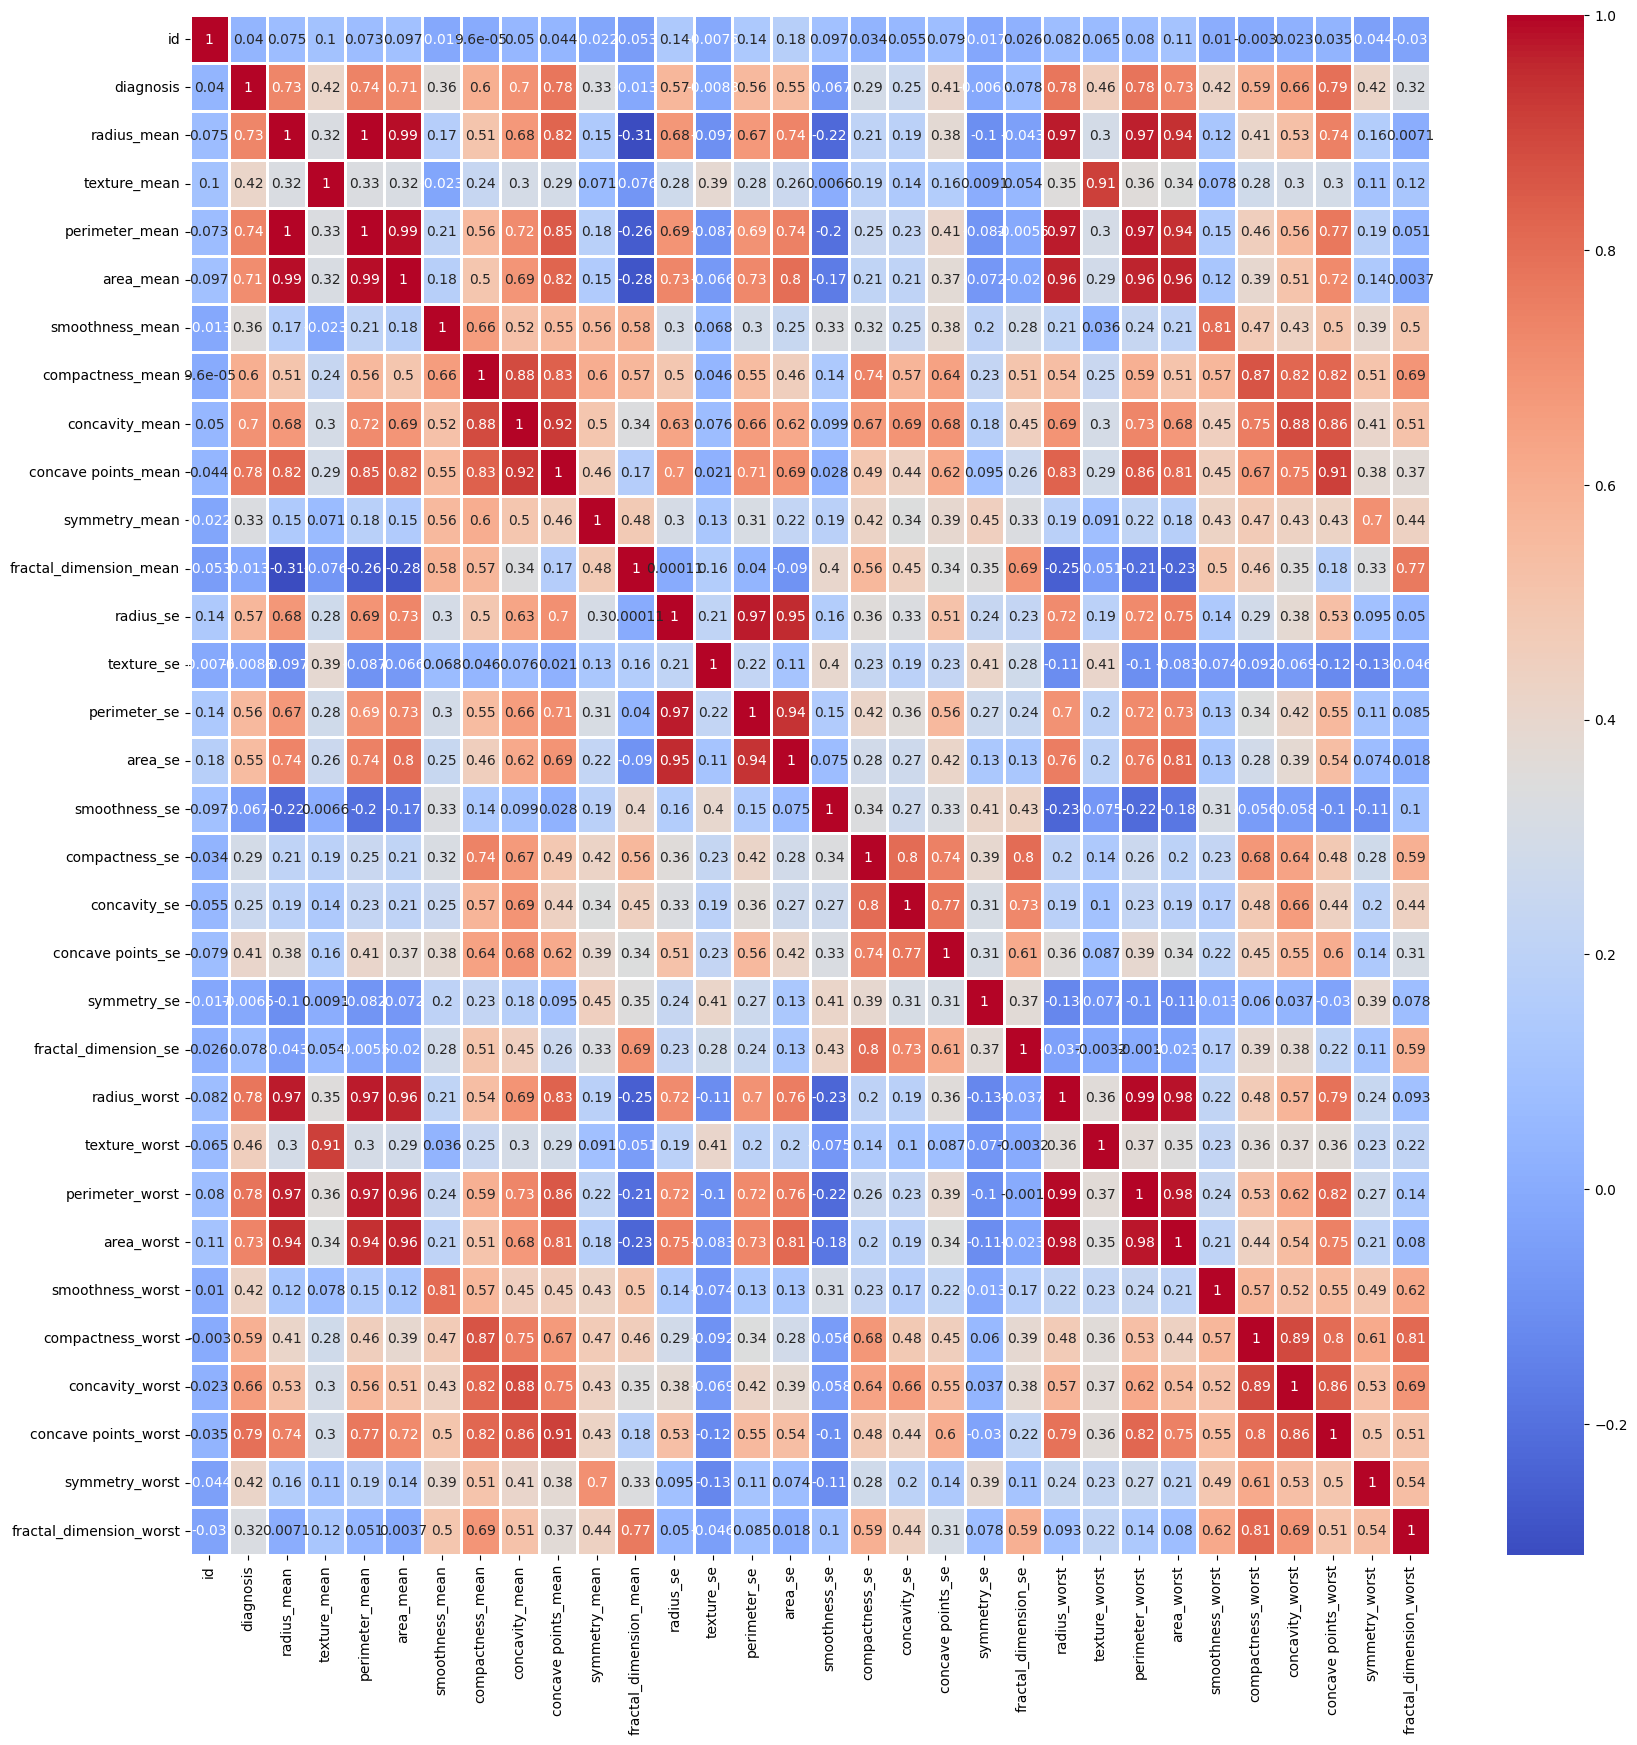

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [69]:
x=df.drop('diagnosis',axis=1)
x.shape

(569, 31)

In [70]:
y=df['diagnosis']
y.shape

(569,)

In [71]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size= .3,random_state=42)

In [72]:
scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [73]:
classifier = Sequential()

classifier.add(Dense(units = 20, activation = 'relu', input_dim = 31))
classifier.add(Dense(units = 15, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [74]:
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
classifier.fit(train_x, train_y, batch_size=1,  epochs = 100)

Epoch 1/100
398/398 [==============================] - 2s 3ms/step - loss: 0.3963 - accuracy: 0.8543
Epoch 2/100
398/398 [==============================] - 1s 3ms/step - loss: 0.1468 - accuracy: 0.9497
Epoch 3/100
398/398 [==============================] - 1s 3ms/step - loss: 0.0914 - accuracy: 0.9749
Epoch 4/100
398/398 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9774
Epoch 5/100
398/398 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9799
Epoch 6/100
398/398 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9799
Epoch 7/100
398/398 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9824
Epoch 8/100
398/398 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9849
Epoch 9/100
398/398 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9849
Epoch 10/100
398/398 [==============================] - 1s 2ms/step - loss: 0.0778 - accura

In [76]:
pred_y=classifier.predict(test_x)
pred_y=[1 if y>=0.5 else 0 for y in pred_y]


6/6 [==============================] - 0s 2ms/step


In [77]:
accuracy_score(test_y,pred_y)

0.9649122807017544

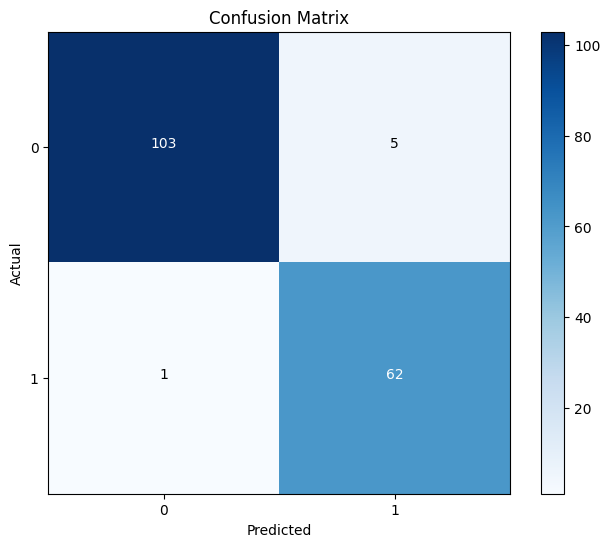

In [78]:

cm = confusion_matrix(test_y, pred_y)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1])
plt.yticks([0, 1])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()